# Prelude: Regular expressions

### Tutorial

##### re module

In [1]:
import re

match = re.search(pat, str) --> Looks for pattern "pat" in string "str"

##### Example

In [2]:
str = 'an example word:cat!! word:tch'
match = re.search(r'word:\w\w\w', str)
# If-statement after search() tests if it succeeded
if match:
  print('found', match.group()) ## 'found word:cat'
else:
  print ('did not find')

found word:cat


The 'r' at the start of the pattern string designates a python "raw" string which passes through backslashes without change

In [3]:
str = 'what do you call a pig with three eyes? piiig! p123g'
match = re.search(r'\d\d\d', str)

# If-statement after search() tests if it succeeded
if match:
  print('found', match.group()) ## 'found word:cat'
else:
  print ('did not find')

found 123


##### Repetition

\+ -- 1 or more occurrences of the pattern to its left, e.g. 'i+' = one or more i's

\* -- 0 or more occurrences of the pattern to its left

? -- match 0 or 1 occurrences of the pattern to its left

^ -- start of a word

In [4]:
str = 'what do you call a pig with three eyes? piiig! p123g'
match = re.search(r'pi+', str)

# If-statement after search() tests if it succeeded
if match:
  print('found', match.group()) ## 'found word:cat'
else:
  print ('did not find')

found pi


##### Find email

\[\w.-]+ means that there can be any '-' '.' or character in any order. And we add the + to say that there can be any number of those.

In [5]:
str = 'purple tanguy-lebg.72@google.com monkey dishwasher'
match = re.search(r'[\w.-]+@[\w.-]+', str)

if match:
    print(match.group())  

tanguy-lebg.72@google.com


##### Group extraction

use parenthesis to separate match into groups

In [6]:
str = 'purple alice-b@google.com monkey dishwasher'
match = re.search(r'([\w.-]+)@([\w.-]+)', str)
if match:
    print(match.group())   ## 'alice-b@google.com' (the whole match)
    print(match.group(1))  ## 'alice-b' (the username, group 1)
    print(match.group(2))  ## 'google.com' (the host, group 2)

alice-b@google.com
alice-b
google.com


##### findall

findall : finds all the matches and returns a list of strings

In [7]:
## Suppose we have a text with many email addresses
str = 'purple alice@google.com, blah monkey bob@abc.com blah dishwasher'

## Here re.findall() returns a list of all the found email strings
emails = re.findall(r'[\w\.-]+@[\w\.-]+', str) ## ['alice@google.com', 'bob@abc.com']
for email in emails:
  # do something with each found email string
  print(email)

alice@google.com
bob@abc.com


in a file let findall iterate for us

In [8]:
# Open file
f = open('./exercices/text.txt', 'r')
# Feed the file text into findall(); it returns a list of all the found strings
strings = re.findall(r'[\w\.-]+@[\w\.-]+', f.read())
for string in strings:
  # do something with each found email string
  print(string)

jeanmiche@coucou.fr
salut@salut.fr
tanguylebg@bg.fr


for groups

findall will create a list of tuple

In [9]:
str = 'purple alice@google.com, blah monkey bob@abc.com blah dishwasher'
tuples = re.findall(r'([\w\.-]+)@([\w\.-]+)', str)
print(tuples)  ## [('alice', 'google.com'), ('bob', 'abc.com')]
for tuple in tuples:
    print(tuple[0])  ## username
    print(tuple[1])  ## host

[('alice', 'google.com'), ('bob', 'abc.com')]
alice
google.com
bob
abc.com


### What are regular expressions ?

Regular expressions forms a langage that is use to find patterns in texts.

### Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits).

In [10]:
f = open('./exercices/test.txt', 'r')

strings = re.findall(r'\b\d{4}\b', f.read())

for string in strings:
    print(string)

1234
9999


### Provide an example of a regex to match words starting with "super". Show that it works on the test-text.

In [11]:
f = open('./exercices/wiki-test.txt', 'r')

# simple links : \[\[[\w-]+\]\]
# other links : \[\[[\w\s\(\)-]+\|[\w\s\(\)-]+\]\]

strings = re.findall(r'\[\[[\w\s\(\)\-\|]+\]\]', f.read())

for string in strings:
    print(string)

[[drinking vinegar]]
[[gentrify]]
[[hashtag]]
[[Bicycle|Bicycle(two-wheeled type)]]
[[Pitchfork|Pitchfork Magazine]]


# Prelude part 2: Pandas DataFrames

### Importing data

In [6]:
import numpy as np
import pandas as pd

In [7]:
df_113 = pd.read_csv('./houses/H113.csv', encoding = 'utf-8')
df_113['Congress Number'] = 113

df_114 = pd.read_csv('./houses/H114.csv')
df_114['Congress Number'] = 114

df_115 = pd.read_csv('./houses/H115.csv')
df_115['Congress Number'] = 115

In [14]:
# Gather all dataframes together and resets the index
# drop = True get rid of the old index
congress_members = pd.concat([df_113, df_114, df_115]).reset_index(drop = True)

In [15]:
congress_members

,WikiPageName,Party,State,Congress Number
0,John_Dingell,Democratic,Michigan,113
1,John_Conyers,Democratic,Michigan,113
2,Charles_Rangel,Democratic,New York,113
3,Bill_Young,Republican,Florida,113
4,Don_Young,Republican,Alaska,113
5,George_Miller_(California_politician),Democratic,California,113
6,Henry_Waxman,Democratic,California,113
7,Ed_Markey,Democratic,Massachusetts,113
8,Nick_Rahall,Democratic,West Virginia,113
9,Jim_Sensenbrenner,Republican,Wisconsin,113


### Number of member appearing in different congresses

In [16]:
# Which member appear in multiple congresses

groups = congress_members.groupby('WikiPageName')

In [17]:
for key, group in groups:
    print(group)
    break;

     WikiPageName       Party     State  Congress Number
260  Aaron_Schock  Republican  Illinois              113
660  Aaron_Schock  Republican  Illinois              114


In [18]:
# Checks the size of the group to see the number of time they appear in each congress
times_in_congress = groups.size().sort_values()

In [19]:
# Using group by to group people having the same number of appearance together 
# The size helps ordering the results
result = times_in_congress.groupby(times_in_congress).size()

In [20]:
import matplotlib.pylab as plt

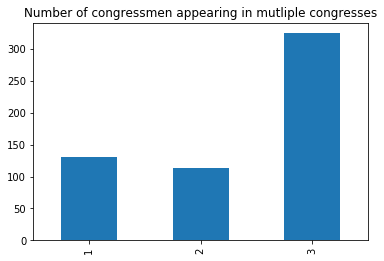

In [21]:
# Plot a histogram

result.plot('bar')
plt.title("Number of congressmen appearing in mutliple congresses")
plt.show()

### Evolution of the number of congressmen

In [22]:
houses = congress_members.groupby('Congress Number').size()

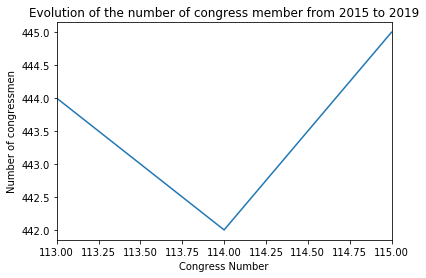

In [23]:
houses.plot()
plt.title("Evolution of the number of congress member from 2015 to 2019")
plt.ylabel("Number of congressmen")
plt.show()

Yes this development overtime is to be expected as the number of congressmen is around the same over the years. The congressmen might change but not the number of them

### State Representation

In [24]:
group_states = congress_members.groupby('State').size()

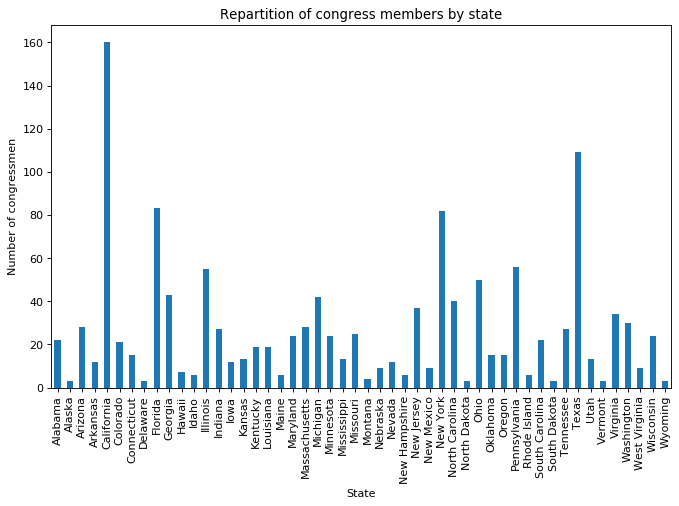

In [25]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

group_states.plot('bar')

plt.title("Repartition of congress members by state")
plt.ylabel("Number of congressmen")
plt.show()

### Composition over time

In [26]:
gp = congress_members.groupby(['Congress Number','Party']).size()

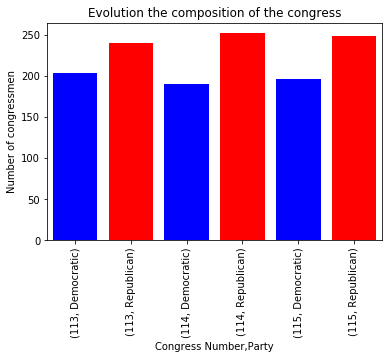

In [27]:
gp.plot('bar')
y_pos = np.arange(len(gp))
plt.bar(y_pos, gp, color=['blue', 'red', 'blue', 'red', 'blue', 'red'])
plt.title("Evolution the composition of the congress")
plt.ylabel("Number of congressmen")
plt.show()

# Part B: Download the Wikipedia pages of politicians

In [10]:
import json
import urllib
import re

## 113th congress

In [9]:
def is_ascii(s):
    return all(ord(c) < 128 for c in s)

In [35]:
baseurl = "http://en.wikipedia.org/w/api.php/?"
action = "action=query"

content = "prop=revisions"
rvprop ="rvprop=timestamp|content"
dataformat = "format=json"
rvdir = "rvdir=older"             #sort revisions from newest to oldest
start = "rvend=2000-01-01T00:00:00Z" #start of my time period
end = "rvstart=2015-01-01T00:00:00Z" #end of my time period
limit = "rvlimit=1" #consider only the first revision

for key, politician in df_113.groupby('WikiPageName'):
    wikiName = politician.iloc[0]['WikiPageName']
    # Checks if its ascii to avoid é problems
    if is_ascii(wikiName):
        title = "titles=" + wikiName
        query = "{}{}&{}&{}&{}&{}&{}&{}&{}&{}".format(baseurl, action, title, content, rvprop, dataformat, rvdir, end, start, limit)
        response = urllib.request.urlopen(query)
        source = response.read()
        jsonObj = json.loads(source)
        filePath = "./politicians/113th/" + wikiName + ".txt"
        file = open(filePath,"w+")
        file.write(json.dumps(jsonObj['query']['pages']))
        file.close()

### 114th congress

In [69]:
baseurl = "http://en.wikipedia.org/w/api.php/?"
action = "action=query"

content = "prop=revisions"
rvprop ="rvprop=timestamp|content"
dataformat = "format=json"
rvdir = "rvdir=older"             #sort revisions from newest to oldest
start = "rvend=2000-01-01T00:00:00Z" #start of my time period
end = "rvstart=2017-01-01T00:00:00Z" #end of my time period
limit = "rvlimit=1" #consider only the first revision

for key, politician in df_114.groupby('WikiPageName'):
    wikiName = politician.iloc[0]['WikiPageName']
    # Checks if its ascii to avoid é problems
    if is_ascii(wikiName):
        title = "titles=" + wikiName
        query = "{}{}&{}&{}&{}&{}&{}&{}&{}&{}".format(baseurl, action, title, content, rvprop, dataformat, rvdir, end, start, limit)
        response = urllib.request.urlopen(query)
        source = response.read()
        jsonObj = json.loads(source)
        filePath = "./politicians/114th/" + wikiName + ".txt"
        file = open(filePath,"w+")
        file.write(json.dumps(jsonObj['query']['pages']))
        file.close()

### 115th Congress

In [70]:
baseurl = "http://en.wikipedia.org/w/api.php/?"
action = "action=query"

content = "prop=revisions"
rvprop ="rvprop=timestamp|content"
dataformat = "format=json"
rvdir = "rvdir=older"             #sort revisions from newest to oldest
start = "rvend=2000-01-01T00:00:00Z" #start of my time period
end = "rvstart=2019-01-01T00:00:00Z" #end of my time period
limit = "rvlimit=1" #consider only the first revision

for key, politician in df_115.groupby('WikiPageName'):
    wikiName = politician.iloc[0]['WikiPageName']
    # Checks if its ascii to avoid é problems
    if is_ascii(wikiName):
        title = "titles=" + wikiName
        query = "{}{}&{}&{}&{}&{}&{}&{}&{}&{}".format(baseurl, action, title, content, rvprop, dataformat, rvdir, end, start, limit)
        response = urllib.request.urlopen(query)
        source = response.read()
        jsonObj = json.loads(source)
        filePath = "./politicians/115th/" + wikiName + ".txt"
        file = open(filePath,"w+")
        file.write(json.dumps(jsonObj['query']['pages']))
        file.close()

# Part C: Building the networks

In [36]:
import pandas as pd
import io
import re
import collections

## 113th congress

In [19]:
path_folder = "./politicians/113th/"

### Reformat Names

In [56]:
formated_names = []

for i in range(0,len(df_113)):
    name = df_113.iloc[i].WikiPageName.replace('_',' ')
    if is_ascii(name):
        formated_names.append(name)

### Creating the network

In [57]:
G = nx.DiGraph()

In [58]:
edges = []
valid_links = []

for i in range(0,len(df_113)):
    member_name = df_113.iloc[i].WikiPageName.replace('_',' ')
    member_party = df_113.iloc[i].Party
    member_state = df_113.iloc[i].State
    
    if is_ascii(member_name):
        # adding nodes
        G.add_node(member_name, State=member_state, Party=member_party)
        
        # searching for links
        f = io.open(path_folder + df_113.iloc[i].WikiPageName + '.txt','r', encoding = 'utf-8').read()
        links = re.findall("\[\[(.*?)\]\]",f)
        
        # sorting the links
        for link in links:
            for politician_name in formated_names:
                if (politician_name in link) and ('File:' not in link) and ('Image:' not in link):
                    valid_links.append(politician_name)
                    
        # saving links
        edges.append(valid_links)
        valid_links = []

In [59]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 432
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000


In [60]:
# list(G.nodes)

In [61]:
nodes = list(G.nodes)

for j in range(0,len(nodes)):
    for k in edges[j]:
        G.add_edge(nodes[j],k)

In [62]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 432
Number of edges: 1565
Average in degree:   3.6227
Average out degree:   3.6227


<b> What is the number of nodes in the network? And the number of links?
 </b>

There should be as much nodes as there is politicians.

And there is 1565 links in my network that does not include politicians with non-ascii names.

<b> Plot the in and out-degree distributions.
 </b>

In [70]:
# Extracting degrees
degrees = []

for node in nodes:
    degrees.append(G.degree()[node])

In [71]:
# Finding extrema
max_degree = np.amax(degrees)
min_degree = np.amin(degrees)

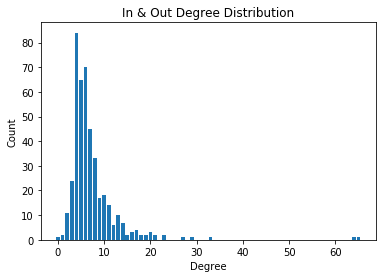

In [75]:
# Create a vector v with all of the values
v = range(min_degree, max_degree+1)

hist = np.histogram(degrees, bins=v)

# Reducing the arrays to the same size (this time the data is discrete so 
# we will just cut the last bin out)
bins = []
heights = []

for ii in range(0, len(hist[0])):
    bins.append(hist[1][ii])
    heights.append(hist[0][ii])
    
plt.bar(bins, heights)
plt.title("In & Out Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

<b> Who is the most connected representative? </b>

In [86]:
dmax = 0

for e in list(G.degree):
    if (e[1] > dmax):
        dmax = e[1]
        most_connected = e[0]
        
print(most_connected + " is the most connected politician")

Nancy Pelosi is the most connected politician


In [85]:
print(list(G.neighbors(max_out_member)))

['Michele Bachmann', 'Tim Walz', 'Betty McCollum', 'Keith Ellison', 'Collin Peterson', 'Patrick McHenry', 'Lynn Westmoreland', 'John Mica', 'Ted Poe', 'Paul Ryan', 'Eric Cantor', 'Jeb Hensarling', 'John Boehner', 'Steve King', 'John Kline (politician)', 'Louie Gohmert', 'Erik Paulsen', 'Darrell Issa', 'Spencer Bachus', 'Jan Schakowsky', 'Steve Pearce (politician)', 'Gus Bilirakis']
